# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest

Os dados são criados a seguir:

In [3]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




Se trata de um teste unilateral à direita, pois o mesmo visa determinar se a média da Estratégia B é significativamente maior do que a da Estratégia A.  

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [4]:
mean_estrategia_A = amostra_estrategia_A.mean()
mean_estrategia_B = amostra_estrategia_B.mean()

print("Média da Estratégia A:", mean_estrategia_A)
print("Média da Estratégia B:", mean_estrategia_B)

var_estrategia_A = amostra_estrategia_A.var()
var_estrategia_B = amostra_estrategia_B.var()

print("Variância da Estratégia A:", var_estrategia_A)
print("Variância da Estratégia B:", var_estrategia_B)

Média da Estratégia A: 71.40559272313098
Média da Estratégia B: 74.74868110507046
Variância da Estratégia A: 126.68018446943104
Variância da Estratégia B: 108.26062024217782


Vemos que a média da estratégia B foi maior do que a estratégia A e também possui uma dispersão menor em seus valores.

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [9]:
z_score, p_value = ztest(amostra_estrategia_B, amostra_estrategia_A, alternative='larger')

print("Estatística Z:", z_score)
print("p-valor:", p_value)

nivel_significancia = 0.05

if p_value < nivel_significancia:
    print("\nRejeitamos a hipótese nula. Há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.")
else:
    print("\nNão rejeitamos a hipótese nula. Não há evidências suficientes para concluir uma diferença significativa nas médias das notas entre as duas estratégias de ensino.")

Estatística Z: 1.5267455833477102
p-valor: 0.06341214386181693

Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir uma diferença significativa nas médias das notas entre as duas estratégias de ensino.


# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

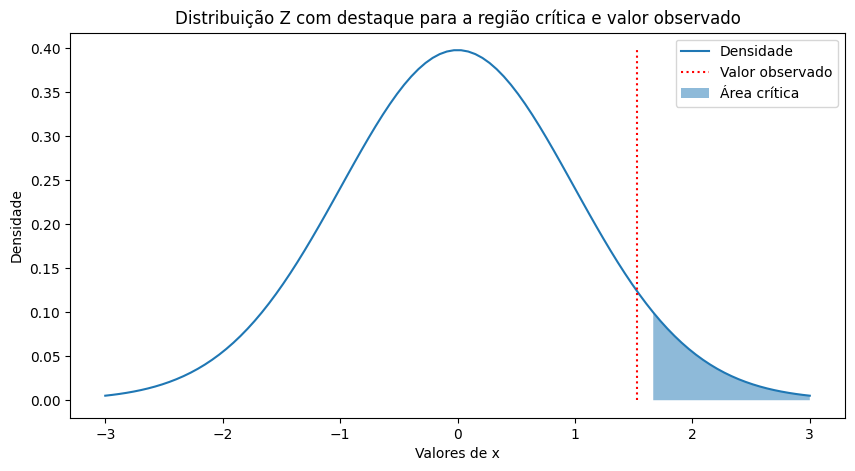

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

mu = 0
variance = 1
sigma = variance**.5

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.t.pdf(x, len(amostra_estrategia_B) + len(amostra_estrategia_A) - 2)

low = stats.t.ppf(.95, len(amostra_estrategia_B) + len(amostra_estrategia_A) - 2)

high = np.inf

ax.plot(x, y, label='Densidade')

ax.vlines(x=[z_score], ymin=0, ymax=y.max(), colors='r', linestyles='dotted', label='Valor observado')

plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5, label='Área crítica')

plt.legend()
plt.xlabel('Valores de x')
plt.ylabel('Densidade')
plt.title('Distribuição Z com destaque para a região crítica e valor observado')
plt.show()

Podemos observar que a estatística Z obtida está fora da área crítica e, portanto, não há evidências suficientes para rejeitar a hipótese nula.